## Approaches:

- Uniform
- Divide in halves and select mid

In [257]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits import mplot3d

## Tests

In [258]:
def test1(c, r):
  return (5*c + (r-25)**2) / 20

def test2(c, r):
  return ((r-22)**2 + (c-238)**2) / 100

def test3(c, r):
  return (r-65)**2 + (c-288)**2

def test4(c, r):
  return (r-50)**2 + (c-250)**2

In [259]:
def plot(func, x=None, y=None, z=None):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # fake data
    _x = np.arange(25, 75, 1)
    _y = np.arange(200, 300, 1)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()

    top = func(y, x)
    bottom = np.zeros_like(top)
    width = 1
    depth = 1

    ax.bar3d(x, y, bottom, width, depth, top, shade=True)
    ax.set_title(func.__name__)
    # plt.savefig(f".././imgs/func4" + ".png")
    plt.show()

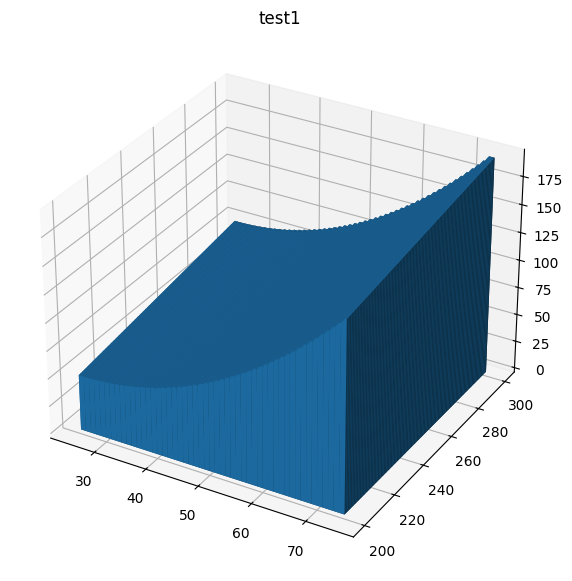

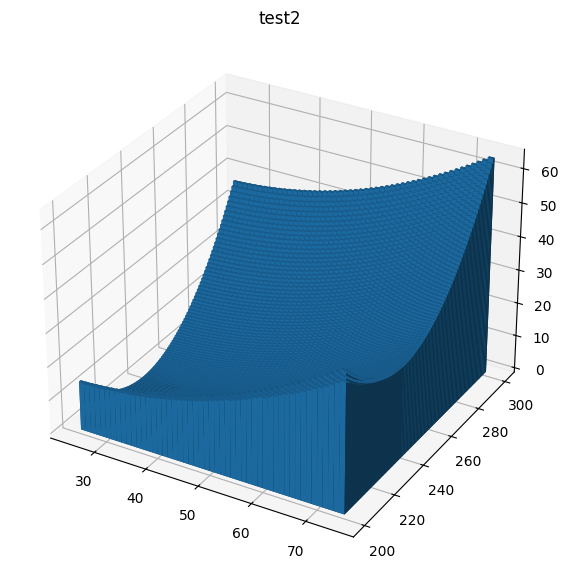

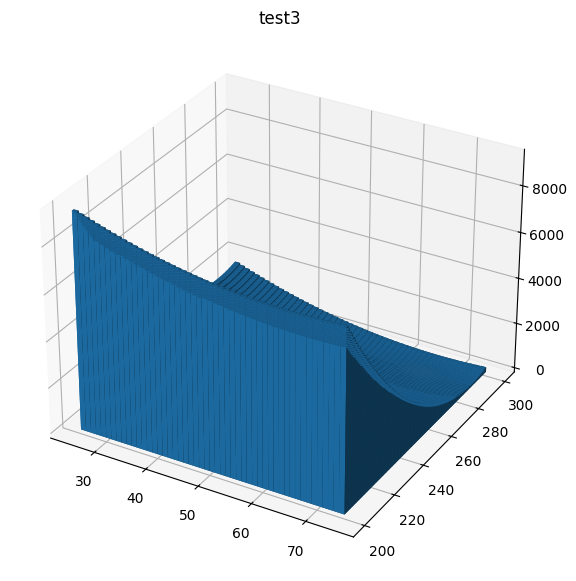

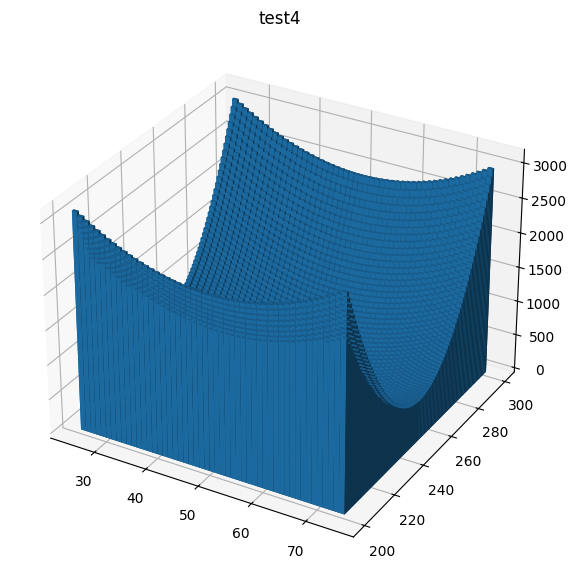

In [260]:
for func in [test1, test2, test3, test4]:
    plot(func)

In [261]:
def getminimum(func):
    x = np.arange(25, 75, 1)
    y = np.arange(200, 300, 1)
    points = []
    for i in x:
        for j in y:
            points.append((j, i, func(j, i)))
    
    points = sorted(points, key=lambda x: x[2])
    return points[0]

# Naive Approach (Uniform points)

Naive minimum for test1 is at:  [200, 25, 50.0]
The minima of the function test1 is at:  (200, 25, 50.0)


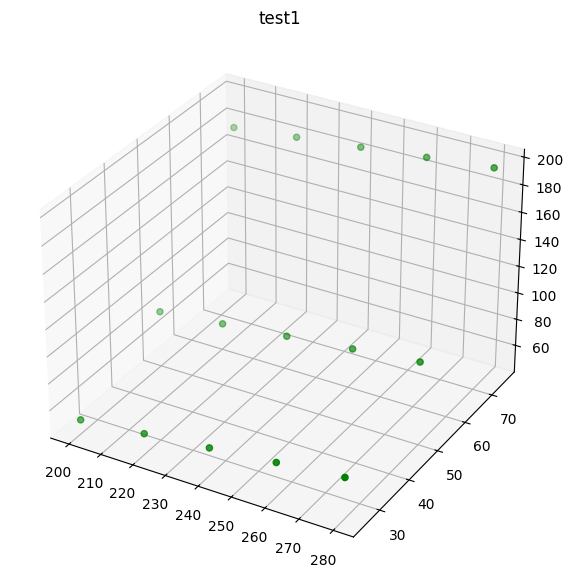

Naive minimum for test2 is at:  [240, 25, 0.13]
The minima of the function test2 is at:  (238, 25, 0.09)


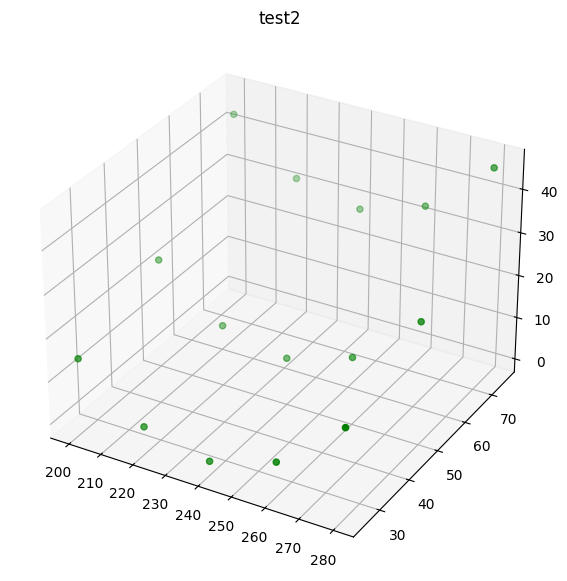

Naive minimum for test3 is at:  [280, 75, 164]
The minima of the function test3 is at:  (288, 65, 0)


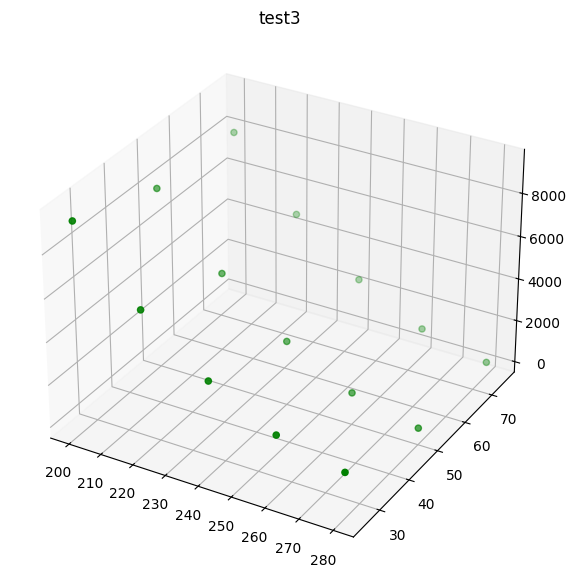

Naive minimum for test4 is at:  [240, 50, 100]
The minima of the function test4 is at:  (250, 50, 0)


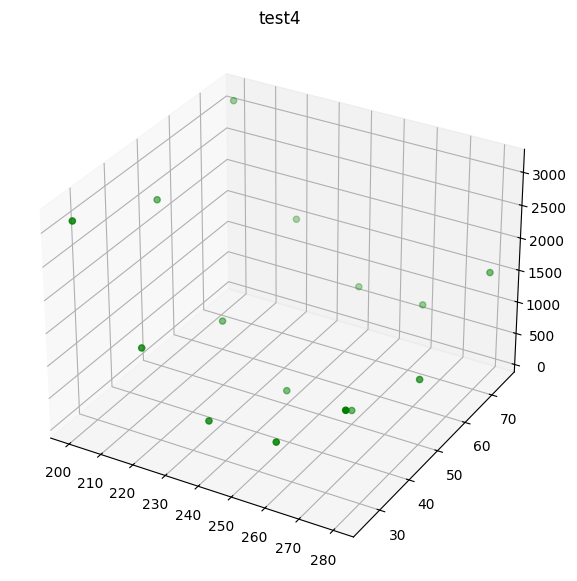

In [262]:
fs = [test1, test2, test3, test4]
X = np.arange(200, 300, 20)
Y = np.arange(25, 76, 25)

for f in fs:
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")

    # Creating plot
    points = []
    for x in X:
        for y in Y:
            points.append([x, y, f(x, y)])

    ppp = np.array([p[0] for p in points])
    qqq = np.array([p[1] for p in points])
    aaa = np.array([p[2] for p in points])
    ax.scatter3D(ppp, qqq, aaa, color = "green")
    plt.title(f"{f.__name__}")
    # plt.savefig(f".././imgs/naive_{f.__name__}" + ".png")
    print(f"Naive minimum for {f.__name__} is at: ", min(points, key=lambda x: x[2]))
    print(f"The minima of the function {f.__name__} is at: ", getminimum(f))
    plt.show()
    

# Divide n Conquer